# Exploring Image Classification of Artwork

This project explores various image classification methods to categorize artwork by artistic style. We aim to identify styles such as Pop Art, Realism, Baroque, and others using techniques like Convolutional Neural Networks (CNNs), data augmentation, and the ResNet50 model. Our goal is to evaluate these methods and determine which yields the most accurate classification results.

Our dataset currently contains 81444 unique images from 1119 different artists in 27 styles

## Import Dataset



In [65]:
pip install kaggle

In [66]:
import kagglehub

# Download WikiArt dataset
path = kagglehub.dataset_download("steubk/wikiart")

print("Path to dataset files:", path)
path = kagglehub.dataset_download("steubk/wikiart")

print(path)

Path to dataset files: /kaggle/input/wikiart
/kaggle/input/wikiart


In [67]:
# View files in Wikiart
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
dataset_path = path
dataset_length = len(os.listdir(dataset_path))
print(f"The dataset contains {dataset_length} items.")
items = os.listdir(path)
print(items)

The dataset contains 29 items.
['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'classes.csv', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'wclasses.csv', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']


In [68]:
all_items = os.listdir(path)
print(all_items)
files = [item for item in all_items if os.path.isfile(os.path.join(path, item))]
folders = [item for item in all_items if os.path.isdir(os.path.join(path, item))]

print("Files:", files)
print("Folders:", folders)

['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'classes.csv', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'wclasses.csv', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impressionism', 'Art_Nouveau_Modern', 'Realism']
Files: ['classes.csv', 'wclasses.csv']
Folders: ['Pop_Art', 'Minimalism', 'Color_Field_Painting', 'Mannerism_Late_Renaissance', 'Symbolism', 'Impressionism', 'Contemporary_Realism', 'High_Renaissance', 'Fauvism', 'Rococo', 'Early_Renaissance', 'Naive_Art_Primitivism', 'Pointillism', 'Cubism', 'Synthetic_Cubism', 'Action_painting', 'Abstract_Expressionism', 'New_Realism', 'Baroque', 'Analytical_Cubism', 'Expressionism', 'Romanticism', 'Northern_Renaissance', 'Ukiyo_e', 'Post_Impression

In [69]:
import os
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models
from sklearn.model_selection import train_test_split

# Define target size and batch size
target_size = (100, 100)
batch_size = 16

# Transform images with the specific target size
data_transforms = {
    'train': transforms.Compose([
        transforms.Resize(target_size[0]),
        transforms.CenterCrop(target_size),
        transforms.ToTensor(),
    ]),
    'val': transforms.Compose([
        transforms.Resize(target_size[0]),
        transforms.CenterCrop(target_size),
        transforms.ToTensor(),
    ]),
    'test': transforms.Compose([
        transforms.Resize(target_size[0]),
        transforms.CenterCrop(target_size),
        transforms.ToTensor(),
    ]),
}

dataset_path = path

full_dataset = datasets.ImageFolder(dataset_path, transform=None)

# Split into train and test+val
train_indices, temp_indices = train_test_split(
    list(range(len(full_dataset))),
    test_size=0.3,
    random_state=42,
    stratify=full_dataset.targets
)

# Split test+val into test and val
test_indices, val_indices = train_test_split(
    temp_indices,
    test_size=0.5,
    random_state=42,
    stratify=[full_dataset.targets[i] for i in temp_indices]
)

# Split the full dataset to train, val and test
train_dataset = torch.utils.data.Subset(full_dataset, train_indices)
val_dataset = torch.utils.data.Subset(full_dataset, val_indices)
test_dataset = torch.utils.data.Subset(full_dataset, test_indices)

# Transform data
train_dataset.dataset.transform = data_transforms['train']
val_dataset.dataset.transform = data_transforms['val']
test_dataset.dataset.transform = data_transforms['test']

# Create data loaders with the specified batch size
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Datasets and Data Loaders created successfully with target size {target_size} and batch size {batch_size}!")


Datasets and Data Loaders created successfully with target size (100, 100) and batch size 16!


In [70]:
print(len(train_dataset))
print(len(val_dataset))
print(len(test_dataset))
print(len(full_dataset))

57010
12217
12217
81444


Displayed images information:
--------------------------------------------------
Image 1:
  Class: Baroque
  Filename: bartolome-esteban-murillo_saint-francis-of-assisi-receiving-the-stigmata.jpg
  Full path: /kaggle/input/wikiart/Baroque/bartolome-esteban-murillo_saint-francis-of-assisi-receiving-the-stigmata.jpg
--------------------------------------------------
Image 2:
  Class: Cubism
  Filename: andr├г┬й-lhote_vue-de-paris-ou-la-seine-au-point-du-jour-1926.jpg
  Full path: /kaggle/input/wikiart/Cubism/andr├г┬й-lhote_vue-de-paris-ou-la-seine-au-point-du-jour-1926.jpg
--------------------------------------------------
Image 3:
  Class: Impressionism
  Filename: pierre-auguste-renoir_georgette-charpentier-seated-1876.jpg
  Full path: /kaggle/input/wikiart/Impressionism/pierre-auguste-renoir_georgette-charpentier-seated-1876.jpg
--------------------------------------------------
Image 4:
  Class: Impressionism
  Filename: camille-pissarro_seated-shepherdess.jpg
  Full path: /kaggle/in

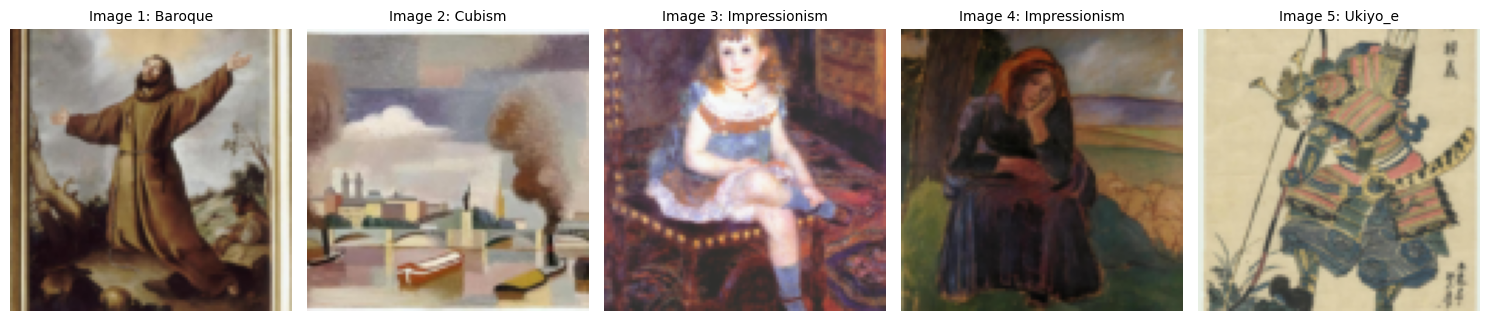

In [71]:
import matplotlib.pyplot as plt
import torch
import os
import random

def display_images_and_print_filenames(dataset, num_images=5):
    # Create a figure
    fig = plt.figure(figsize=(15, 3 * min(num_images, 5)))


    indices = random.sample(range(len(dataset)), min(num_images, len(dataset)))

    # Print header
    print("Displayed images information:")
    print("-" * 50)

    for i, idx in enumerate(indices):
        # Get image and label
        img, label_idx = dataset[idx]

        # Convert tensor to numpy
        img = img.permute(1, 2, 0).numpy()

        # Get the class name
        class_name = dataset.dataset.classes[label_idx]

        # Get the original index in the full dataset
        original_idx = dataset.indices[idx]

        # Get the filename and filepath from the original dataset
        filepath = dataset.dataset.imgs[original_idx][0]
        filename = os.path.basename(filepath)

        # Print image information
        print(f"Image {i+1}:")
        print(f"  Class: {class_name}")
        print(f"  Filename: {filename}")
        print(f"  Full path: {filepath}")
        print("-" * 50)

        # Display image
        ax = fig.add_subplot(1, len(indices), i+1)
        ax.imshow(img)
        ax.set_title(f"Image {i+1}: {class_name}", fontsize=10)
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_images_and_print_filenames(train_dataset)

# Part 1 - Train the Model (Baseline)


*   Train Model
*   Plot the model's accuracy and error
*   Test Score


In [84]:
from torch.utils.data import Subset
import torch
from torch.utils.data import DataLoader


torch.manual_seed(42)

# Create a data subset for training
subset_indices = torch.randperm(len(train_dataset))[:5000]
train_subset = Subset(train_dataset, subset_indices)

# DataLoader
train_loader = DataLoader(
    train_subset,
    batch_size=16,
    shuffle=True,
    num_workers=2,
    pin_memory=True
)
# Get a single batch from the DataLoader
images, labels = next(iter(train_loader))
print("Image shape:", images.shape)
print("Label shape:", labels.shape)


Image shape: torch.Size([16, 3, 100, 100])
Label shape: torch.Size([16])


In [85]:
import tensorflow as tf

def pytorch_to_tf_generator(dataloader):
    for images, labels in dataloader:
        # Convert from (B, C, H, W) to (B, H, W, C)
        images = images.permute(0, 2, 3, 1).float().numpy()
        labels = labels.numpy()
        yield images, labels

train_dataset_tf = tf.data.Dataset.from_generator(
    lambda: pytorch_to_tf_generator(train_loader),
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int64)
    )
)

val_dataset_tf = tf.data.Dataset.from_generator(
    lambda: pytorch_to_tf_generator(val_loader),
    output_signature=(
        tf.TensorSpec(shape=(None, 100, 100, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None,), dtype=tf.int64)
    )
)


In [86]:
from tensorflow.keras import layers, models

baseline = models.Sequential([
    layers.Input(shape=(100, 100, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(27, activation='softmax')
])

baseline.compile(optimizer='adam',
                 loss='sparse_categorical_crossentropy',
                 metrics=['accuracy'])


In [87]:
# Build baseline
input_shape = (100, 100, 3)


In [88]:
baseline.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 47, 47, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 23, 23, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 33856)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 64)             │     2,166,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 27)             │         1,755 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,187,995 (8.35 MB)

 Trainable params: 2,187,995 (8.35 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Define callbacks
import keras
callbacks = [
    keras.callbacks.ModelCheckpoint(
        filepath="baseline.keras",
        save_best_only=True,
        monitor="val_loss")
]

# Train model
history = baseline.fit(
    train_dataset_tf,
    validation_data=val_dataset_tf,
    steps_per_epoch = 200,
    epochs=5,
    batch_size=batch_size,
    callbacks=callbacks
)


Epoch 1/5
200/200 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step - accuracy: 0.1583 - loss: 2.9779

# Part 2 - Use Data Augmentation


# Part 3 - Use Resnet50 to classify images

In [ ]:
# Imports
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision import datasets, models

# Load pretrained model
resnet = models.resnet50(pretrained=True)

In [ ]:
# Modify final layer for current project
import torch.nn as nn

num_classes = 27  # change this to however many genres or categories you have
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

In [ ]:
# Define transforms to preprocess images
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406],
                         [0.229, 0.224, 0.225])
])

In [ ]:
# Load dataset to train
train_dataset = datasets.ImageFolder('dataset/train', transform=transform)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)

val_dataset = datasets.ImageFolder('dataset/val', transform=transform)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=32, shuffle=False)